In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Collecting dataset

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/Advertising.csv'
ad_cost_df = pd.read_csv(path)
ad_cost_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# removing first column which is just an index column
ad_cost_df.drop(columns = ['Unnamed: 0'], inplace = True)
ad_cost_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Analyzing data

In [4]:
ad_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


It contain 199 rows and 4 columns of data type float

In [5]:
ad_cost_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
ad_cost_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

It does not contain any null values

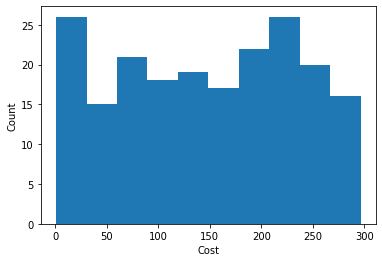

In [7]:
plt.hist(ad_cost_df['TV'])
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

Above graph shows that people spends much money for advertising through TV.

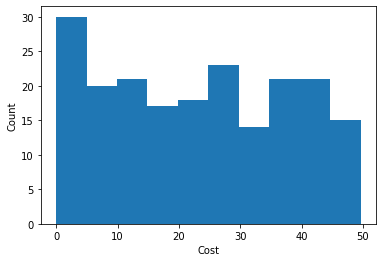

In [8]:
plt.hist(ad_cost_df['Radio'])
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

People spends minimum amount of money in Radio advertising.

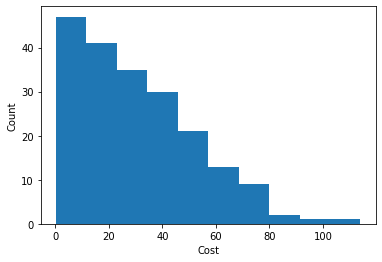

In [9]:
plt.hist(ad_cost_df['Newspaper'])
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

In [10]:
# to find the pairwise correlation of all columns
ad_cost_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Sales is mostly depends on TV advertising.

# Model training

Since our output variable is a continuous so we using Linear Regression and KNN algorithm to train our ML model.

**Splitting dataset**

In [11]:
# feature variables
X = ad_cost_df.drop(columns = ['Sales'])
# output variable
Y = ad_cost_df['Sales']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.29, random_state=7)

print('Size of training dataset X : ', x_train.shape)
print('Size of training dataset Y : ', y_train.shape)
print('Size of testing dataset X : ', x_test.shape)
print('Size of testing dataset Y : ', y_test.shape)

Size of training dataset X :  (142, 3)
Size of training dataset Y :  (142,)
Size of testing dataset X :  (58, 3)
Size of testing dataset Y :  (58,)


**Linear Regression**

In [12]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
print('Accuracy of Linear Regression Model : ', LR_model.score(x_test, y_test))

Accuracy of Linear Regression Model :  0.8889293598910791


**K Nearest Neighbor**

In [13]:
from sklearn.neighbors import KNeighborsRegressor

KNN_model = KNeighborsRegressor(n_neighbors=2)
KNN_model.fit(x_train, y_train)
print('Accuracy of K-Nearest Neighbor Model : ', KNN_model.score(x_test, y_test))

Accuracy of K-Nearest Neighbor Model :  0.9437702973595619


# Model Evaluation

In [14]:
from sklearn.metrics import r2_score

R2 values are used to calculate a measure of how close the predicted values are to the true values.

In [15]:
actual_sales = np.array(y_test) # since y_test is of type pandas Series

predicted_sales_fromLR = LR_model.predict(x_test)
print('R2 score of Linear Regression Model :', r2_score(predicted_sales_fromLR, actual_sales))

predicted_sales_fromKNN = KNN_model.predict(x_test)
print('R2 score of K-Nearest Neighbors Model :', r2_score(predicted_sales_fromKNN, actual_sales))

R2 score of Linear Regression Model : 0.8942091798674691
R2 score of K-Nearest Neighbors Model : 0.9384462150429702


**From Linear Regression and K-Nearest Neigbhor model 'K-Nearest Neighbor' is more accurate.**

# Predictions

In [16]:
for i in range(len(y_test)):
  print('Prediction -> Linear Regression  |  K-Nearest Neighbors')
  print('             ', predicted_sales_fromLR[i], '    ', predicted_sales_fromKNN[i])
  print('Actual Sale : ', actual_sales[i], '\n')

Prediction -> Linear Regression  |  K-Nearest Neighbors
              11.438246807737876      11.100000000000001
Actual Sale :  12.0 

Prediction -> Linear Regression  |  K-Nearest Neighbors
              14.36059199178442      15.7
Actual Sale :  15.5 

Prediction -> Linear Regression  |  K-Nearest Neighbors
              6.228340353771593      7.0
Actual Sale :  5.6 

Prediction -> Linear Regression  |  K-Nearest Neighbors
              17.31350108541198      17.15
Actual Sale :  17.4 

Prediction -> Linear Regression  |  K-Nearest Neighbors
              5.098430786535022      7.65
Actual Sale :  7.6 

Prediction -> Linear Regression  |  K-Nearest Neighbors
              12.132100316480267      8.2
Actual Sale :  9.3 

Prediction -> Linear Regression  |  K-Nearest Neighbors
              7.599155817312332      7.0
Actual Sale :  7.0 

Prediction -> Linear Regression  |  K-Nearest Neighbors
              10.333802351559044      11.3
Actual Sale :  11.5 

Prediction -> Linear Regressi